In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder

In [ ]:
data=pd.read_csv('Fraud_check.csv')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


## Visualising the taxable income to convert it into category

(array([57., 53., 75., 58., 56., 59., 64., 53., 52., 73.]),
 array([10003. , 18964.6, 27926.2, 36887.8, 45849.4, 54811. , 63772.6,
        72734.2, 81695.8, 90657.4, 99619. ]),
 <BarContainer object of 10 artists>)

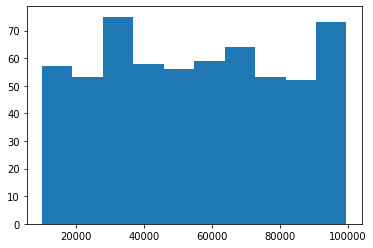

In [ ]:
plt.hist(x=data['Taxable.Income'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work.Experience'>

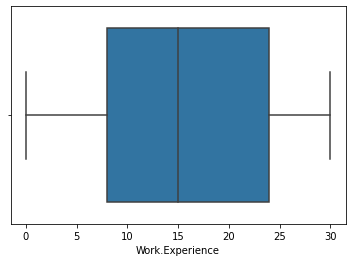

In [ ]:
sns.boxplot(data['Work.Experience'])

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City.Population'>

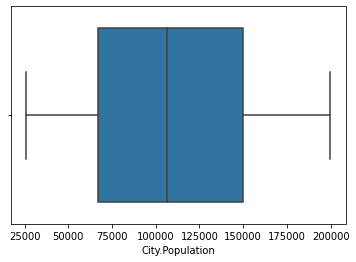

In [ ]:
sns.boxplot(data['City.Population'])

## After visualising the data we can see no outliers are present

In [ ]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


## EDA

In [ ]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

## Converting The Variables into Labels

In [ ]:
data1=pd.get_dummies(data,columns=['Undergrad','Marital.Status','Urban'], drop_first=True)



In [ ]:
data1["Tax_disc"] = pd.cut(x=data1["Taxable.Income"], bins = [10000,30000,99620], labels = ["Good", "Risky"])

In [ ]:
data1.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES,Tax_disc
0,68833,50047,10,0,0,1,1,Risky
1,33700,134075,18,1,0,0,1,Risky
2,36925,160205,30,0,1,0,1,Risky
3,50190,193264,15,1,0,1,1,Risky
4,81002,27533,28,0,1,0,0,Risky


In [ ]:
data['Work.Experience'].describe()

count    600.000000
mean      15.558333
std        8.842147
min        0.000000
25%        8.000000
50%       15.000000
75%       24.000000
max       30.000000
Name: Work.Experience, dtype: float64

In [ ]:
data1.dtypes

Taxable.Income               int64
City.Population              int64
Work.Experience              int64
Undergrad_YES                uint8
Marital.Status_Married       uint8
Marital.Status_Single        uint8
Urban_YES                    uint8
Tax_disc                  category
dtype: object

In [ ]:
x_1=data1.iloc[:,1:7]
y_1=pd.DataFrame(data1['Tax_disc'])

In [ ]:
x_1.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,50047,10,0,0,1,1
1,134075,18,1,0,0,1
2,160205,30,0,1,0,1
3,193264,15,1,0,1,1
4,27533,28,0,1,0,0


In [ ]:
y_1.head()

,Tax_disc
0,Risky
1,Risky
2,Risky
3,Risky
4,Risky


## Normalising Data

In [ ]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [ ]:
x = norm_func(x_1)
x.head()

,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0


In [ ]:

x=x.rename(columns={"City.Population":"population","Work.Experience":"work_ex","Undergrad_YES":"undergrad","Marital.Status_Married":"Married","Marital.Status_Single":"Single","Urban_YES":"Urban"})

In [ ]:
x.head()

,population,work_ex,undergrad,Married,Single,Urban
0,0.139472,0.333333,0.0,0.0,1.0,1.0
1,0.622394,0.600000,1.0,0.0,0.0,1.0
2,0.772568,1.000000,0.0,1.0,0.0,1.0
3,0.962563,0.500000,1.0,0.0,1.0,1.0
4,0.010081,0.933333,0.0,1.0,0.0,0.0


In [ ]:
le= LabelEncoder()
y= le.fit_transform(y_1)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

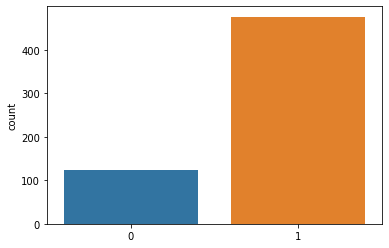

In [ ]:
sns.countplot(y)

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,

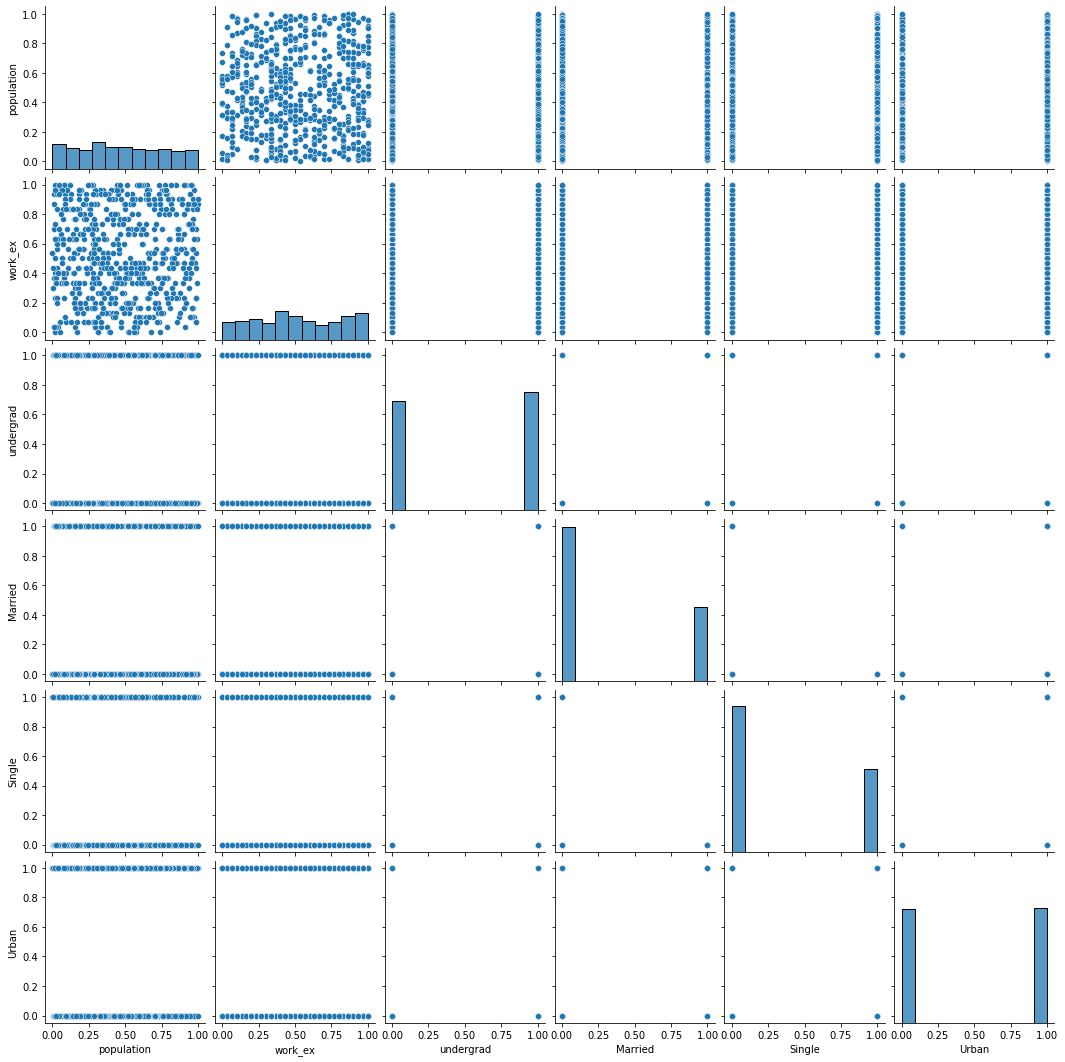

In [ ]:
sns.pairplot(x)

## Spliting Data

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)

## Model

In [ ]:
model= DecisionTreeClassifier(criterion='entropy',max_depth=6)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

## Ploting Tree

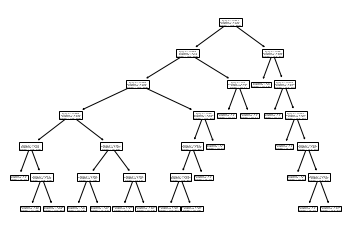

In [ ]:
tree.plot_tree(model);

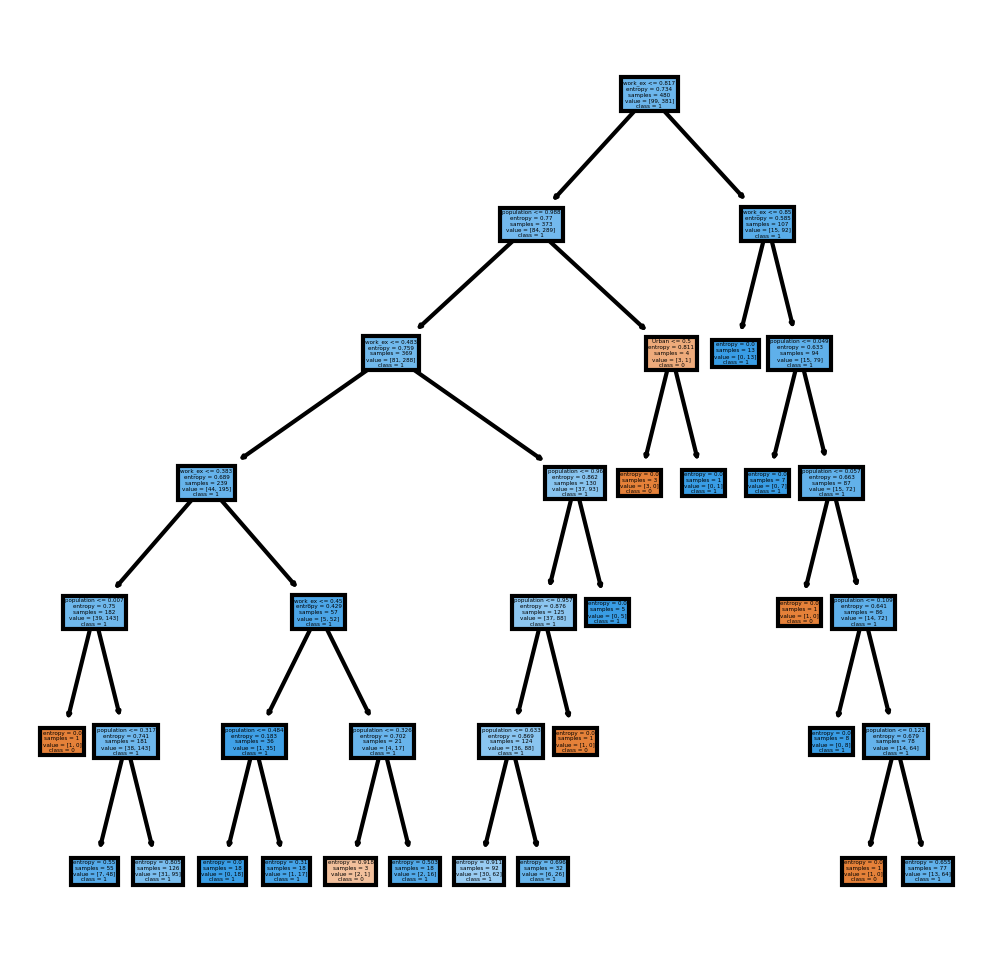

In [ ]:
features=['population','work_ex','undergrad','Married','Single','Urban']
class_=['0','1']
fig,axes= plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=features,class_names=class_,filled=True);

## Predicting Values

In [ ]:
prediction= model.predict(x_test)
pd.Series(prediction)
pd.crosstab(y_test,prediction)

col_0,0,1
row_0,,
0,2,23
1,1,94


In [ ]:
model.score(x_test,y_test) # Accuracy

0.8

In [ ]:
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,auc
from sklearn import metrics

In [ ]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.67      0.08      0.14        25
           1       0.80      0.99      0.89        95

    accuracy                           0.80       120
   macro avg       0.74      0.53      0.51       120
weighted avg       0.77      0.80      0.73       120



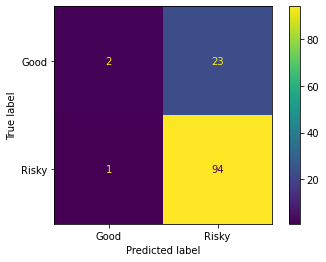

In [ ]:
confu = metrics.confusion_matrix(y_test, prediction)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confu, display_labels = ['Good','Risky'])

cm_display.plot()
plt.show()

Text(0, 0.5, 'True Positive Rate')

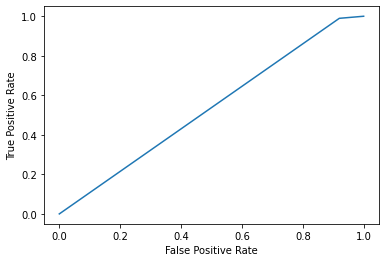

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, prediction)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [ ]:
roc_auc_score(y_test,prediction)

0.5347368421052631

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, prediction))
rms

0.4472135954999579

In [1]:
spec= 94/(94+23)
spec

0.8034188034188035

## On evaluating the above model we find that 
1. The F1 scores are the following: 

* '0'-0.14
* '1'-0.89


2. The Accuracy is 80%
3. The RMSE value is  0.44
4. For the above model we need high specifity because, we do not want the risky criterion to be detected as good. Specificity is 0.8
## All the above parameters sugest that this is a good model